<a href="https://colab.research.google.com/github/Naufil-sayed/DVP/blob/main/most_streamed_spotify_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/content/spotify-2023.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sketch
from dataprep.eda import plot, plot_correlation, plot_missing
pd.set_option('display.max_columns', 50)

In [ ]:
pip install dataprep


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 91.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252697 sha256=ec5b133ed4dbf262780c86fd1fd15c613d06f8e70a4a84d78b987481d0ff77bc
  Stored in directory: /roo

In [ ]:
pip install sketch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.0/827.0 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.8 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

In [ ]:
df.loc[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,0,54,0,0,110,A,Major,53,75,69,7,0,17,3


In [ ]:
def clean_data(df):
    df.drop([574], inplace=True)
    df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '')
    df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',','')
    df['streams'] = df['streams'].str.replace(',', '')
    df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'])
    df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'])
    df['streams'] = pd.to_numeric(df['streams'])

    return df

from copy import deepcopy
df = clean_data(deepcopy(df))

In [ ]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425.0,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    int64  
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int64  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    float64
 14  bpm                   952 non-null    int64  
 15  key                   8

Two columns are missing values "in_shazam_charts" and "key"

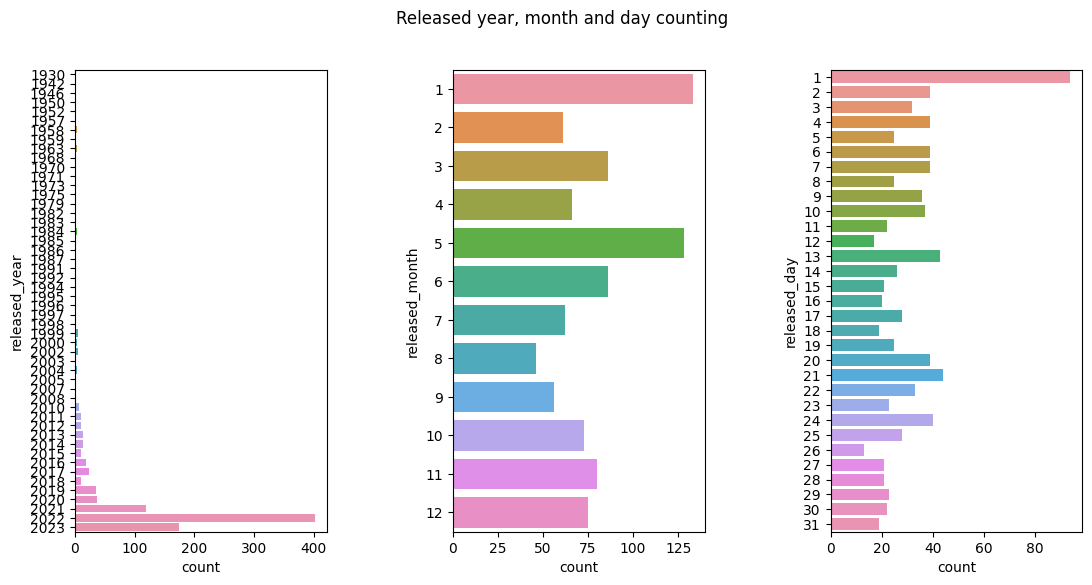

In [ ]:
fig = plt.figure(figsize=(13, 6))
fig.add_subplot(131)
sns.countplot(data=df, y='released_year')

fig.add_subplot(132)
sns.countplot(data=df, y='released_month')

fig.add_subplot(133)
sns.countplot(data=df, y='released_day')
plt.subplots_adjust(wspace=.5)
plt.suptitle('Released year, month and day counting')
plt.show()

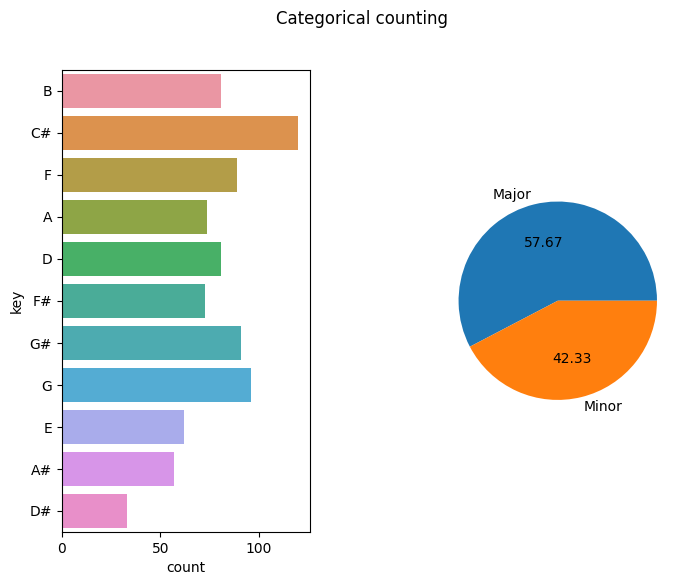

In [ ]:
fig = plt.figure(figsize=(8,6))
fig.add_subplot(121)
sns.countplot(data=df, y='key')

fig.add_subplot(122)
plt.pie(df['mode'].value_counts().values, labels=df['mode'].value_counts().index, autopct='%.2f')
plt.subplots_adjust(wspace=.5)
plt.suptitle('Categorical counting')
plt.show()

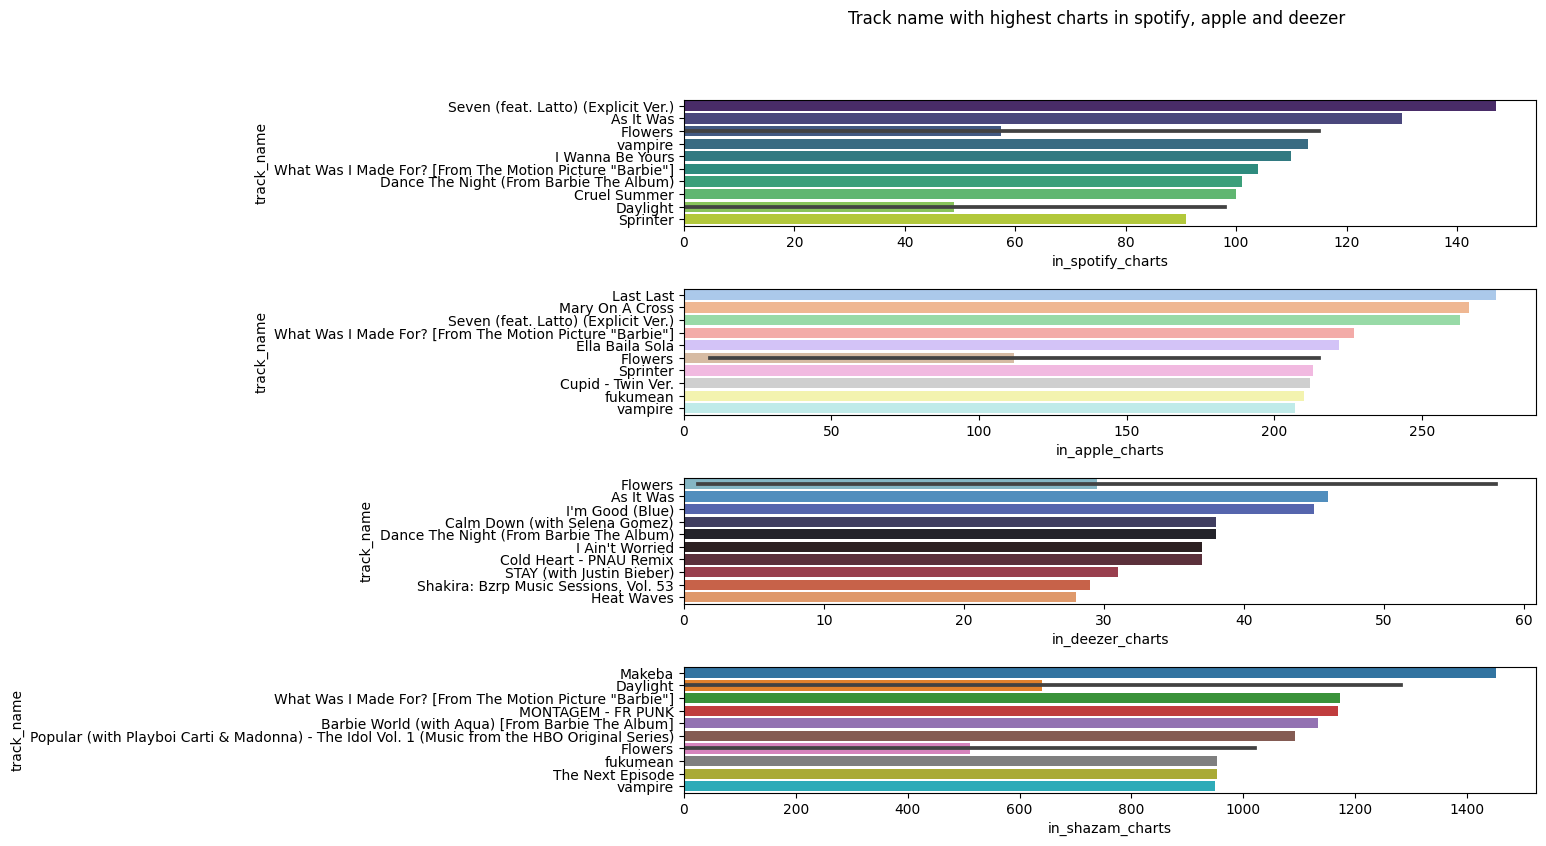

In [ ]:
fig = plt.figure(figsize=(11, 9))
fig.add_subplot(411)
sns.barplot(data=df, y='track_name', x='in_spotify_charts', order=df[['track_name', 'in_spotify_charts']].nlargest(10, 'in_spotify_charts')['track_name'].values, palette='viridis')

fig.add_subplot(412)
sns.barplot(data=df, y='track_name', x='in_apple_charts', order=df[['track_name', 'in_apple_charts']].nlargest(10, 'in_apple_charts')['track_name'].values, palette='pastel')

fig.add_subplot(413)
sns.barplot(data=df, y='track_name', x='in_deezer_charts', order=df[['track_name', 'in_deezer_charts']].nlargest(10, 'in_deezer_charts')['track_name'].values, palette='icefire')

fig.add_subplot(414)
sns.barplot(data=df, y='track_name', x='in_shazam_charts', order=df[['track_name', 'in_shazam_charts']].nlargest(10, 'in_shazam_charts')['track_name'].values, palette='tab10')
plt.subplots_adjust(hspace=.5)
plt.suptitle('Track name with highest charts in spotify, apple and deezer')
plt.show()

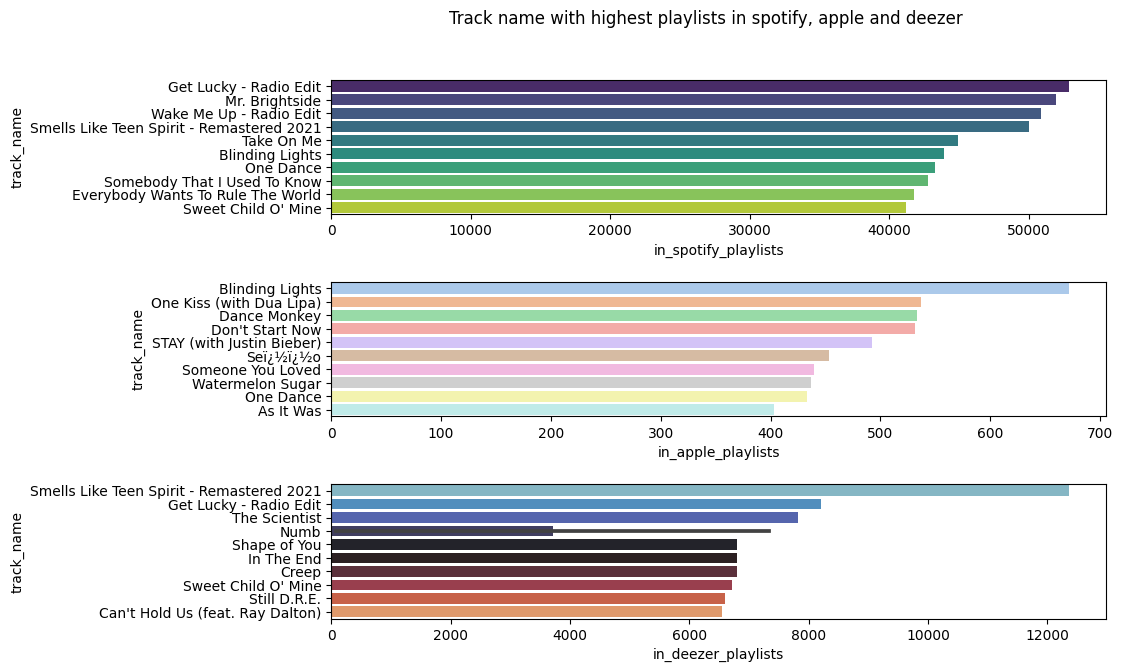

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(311)
sns.barplot(data=df, y='track_name', x='in_spotify_playlists', order=df[['track_name', 'in_spotify_playlists']].nlargest(10, 'in_spotify_playlists')['track_name'].values, palette='viridis')

fig.add_subplot(312)
sns.barplot(data=df, y='track_name', x='in_apple_playlists', order=df[['track_name', 'in_apple_playlists']].nlargest(10, 'in_apple_playlists')['track_name'].values, palette='pastel')

fig.add_subplot(313)
sns.barplot(data=df, y='track_name', x='in_deezer_playlists', order=df[['track_name', 'in_deezer_playlists']].nlargest(10, 'in_deezer_playlists')['track_name'].values, palette='icefire')
plt.subplots_adjust(hspace=.5)
plt.suptitle('Track name with highest playlists in spotify, apple and deezer')
plt.show()

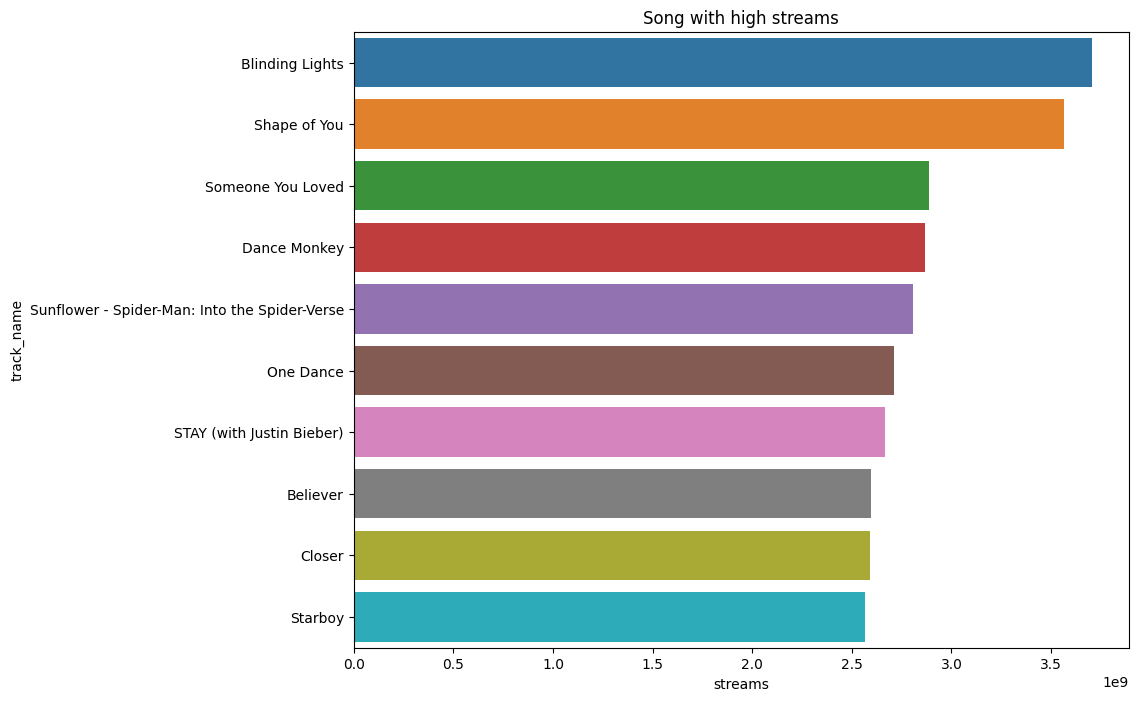

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, y='track_name', x='streams', order=df[['track_name', 'streams']].nlargest(10, 'streams')['track_name'].values)
plt.title('Song with high streams')
plt.show()

In [ ]:
df.query('track_name in ("Blinding Lights", "Shape of You")')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,3421,20,NaN,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,0,6808,7,0.0,96,C#,Minor,83,93,65,58,0,9,8


In [ ]:
df.describe().round().T.style.background_gradient(axis=1)

,count,mean,std,min,25%,50%,75%,max
artist_count,952.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,8.000000
released_year,952.000000,2018.000000,11.000000,1930.000000,2020.000000,2022.000000,2022.000000,2023.000000
released_month,952.000000,6.000000,4.000000,1.000000,3.000000,6.000000,9.000000,12.000000
released_day,952.000000,14.000000,9.000000,1.000000,6.000000,13.000000,22.000000,31.000000
in_spotify_playlists,952.000000,5203.000000,7901.000000,31.000000,874.000000,2216.000000,5574.000000,52898.000000
in_spotify_charts,952.000000,12.000000,20.000000,0.000000,0.000000,3.000000,16.000000,147.000000
streams,952.000000,514137425.000000,566856949.000000,2762.000000,141636175.000000,290530915.000000,673869022.000000,3703895074.000000
in_apple_playlists,952.000000,68.000000,86.000000,0.000000,13.000000,34.000000,88.000000,672.000000
in_apple_charts,952.000000,52.000000,51.000000,0.000000,7.000000,38.000000,87.000000,275.000000
in_deezer_playlists,952.000000,386.000000,1131.000000,0.000000,13.000000,44.000000,164.000000,12367.000000


It was noted that the song that provided one of the most positive and energetic content was recorded as the song that had the most streams.

<Axes: xlabel='count', ylabel='artist(s)_name'>

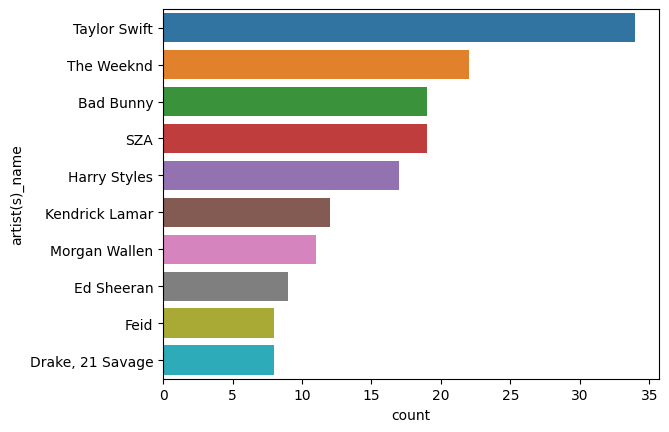

In [ ]:
sns.countplot(data=df, y='artist(s)_name', order=df['artist(s)_name'].value_counts().nlargest(10).index)

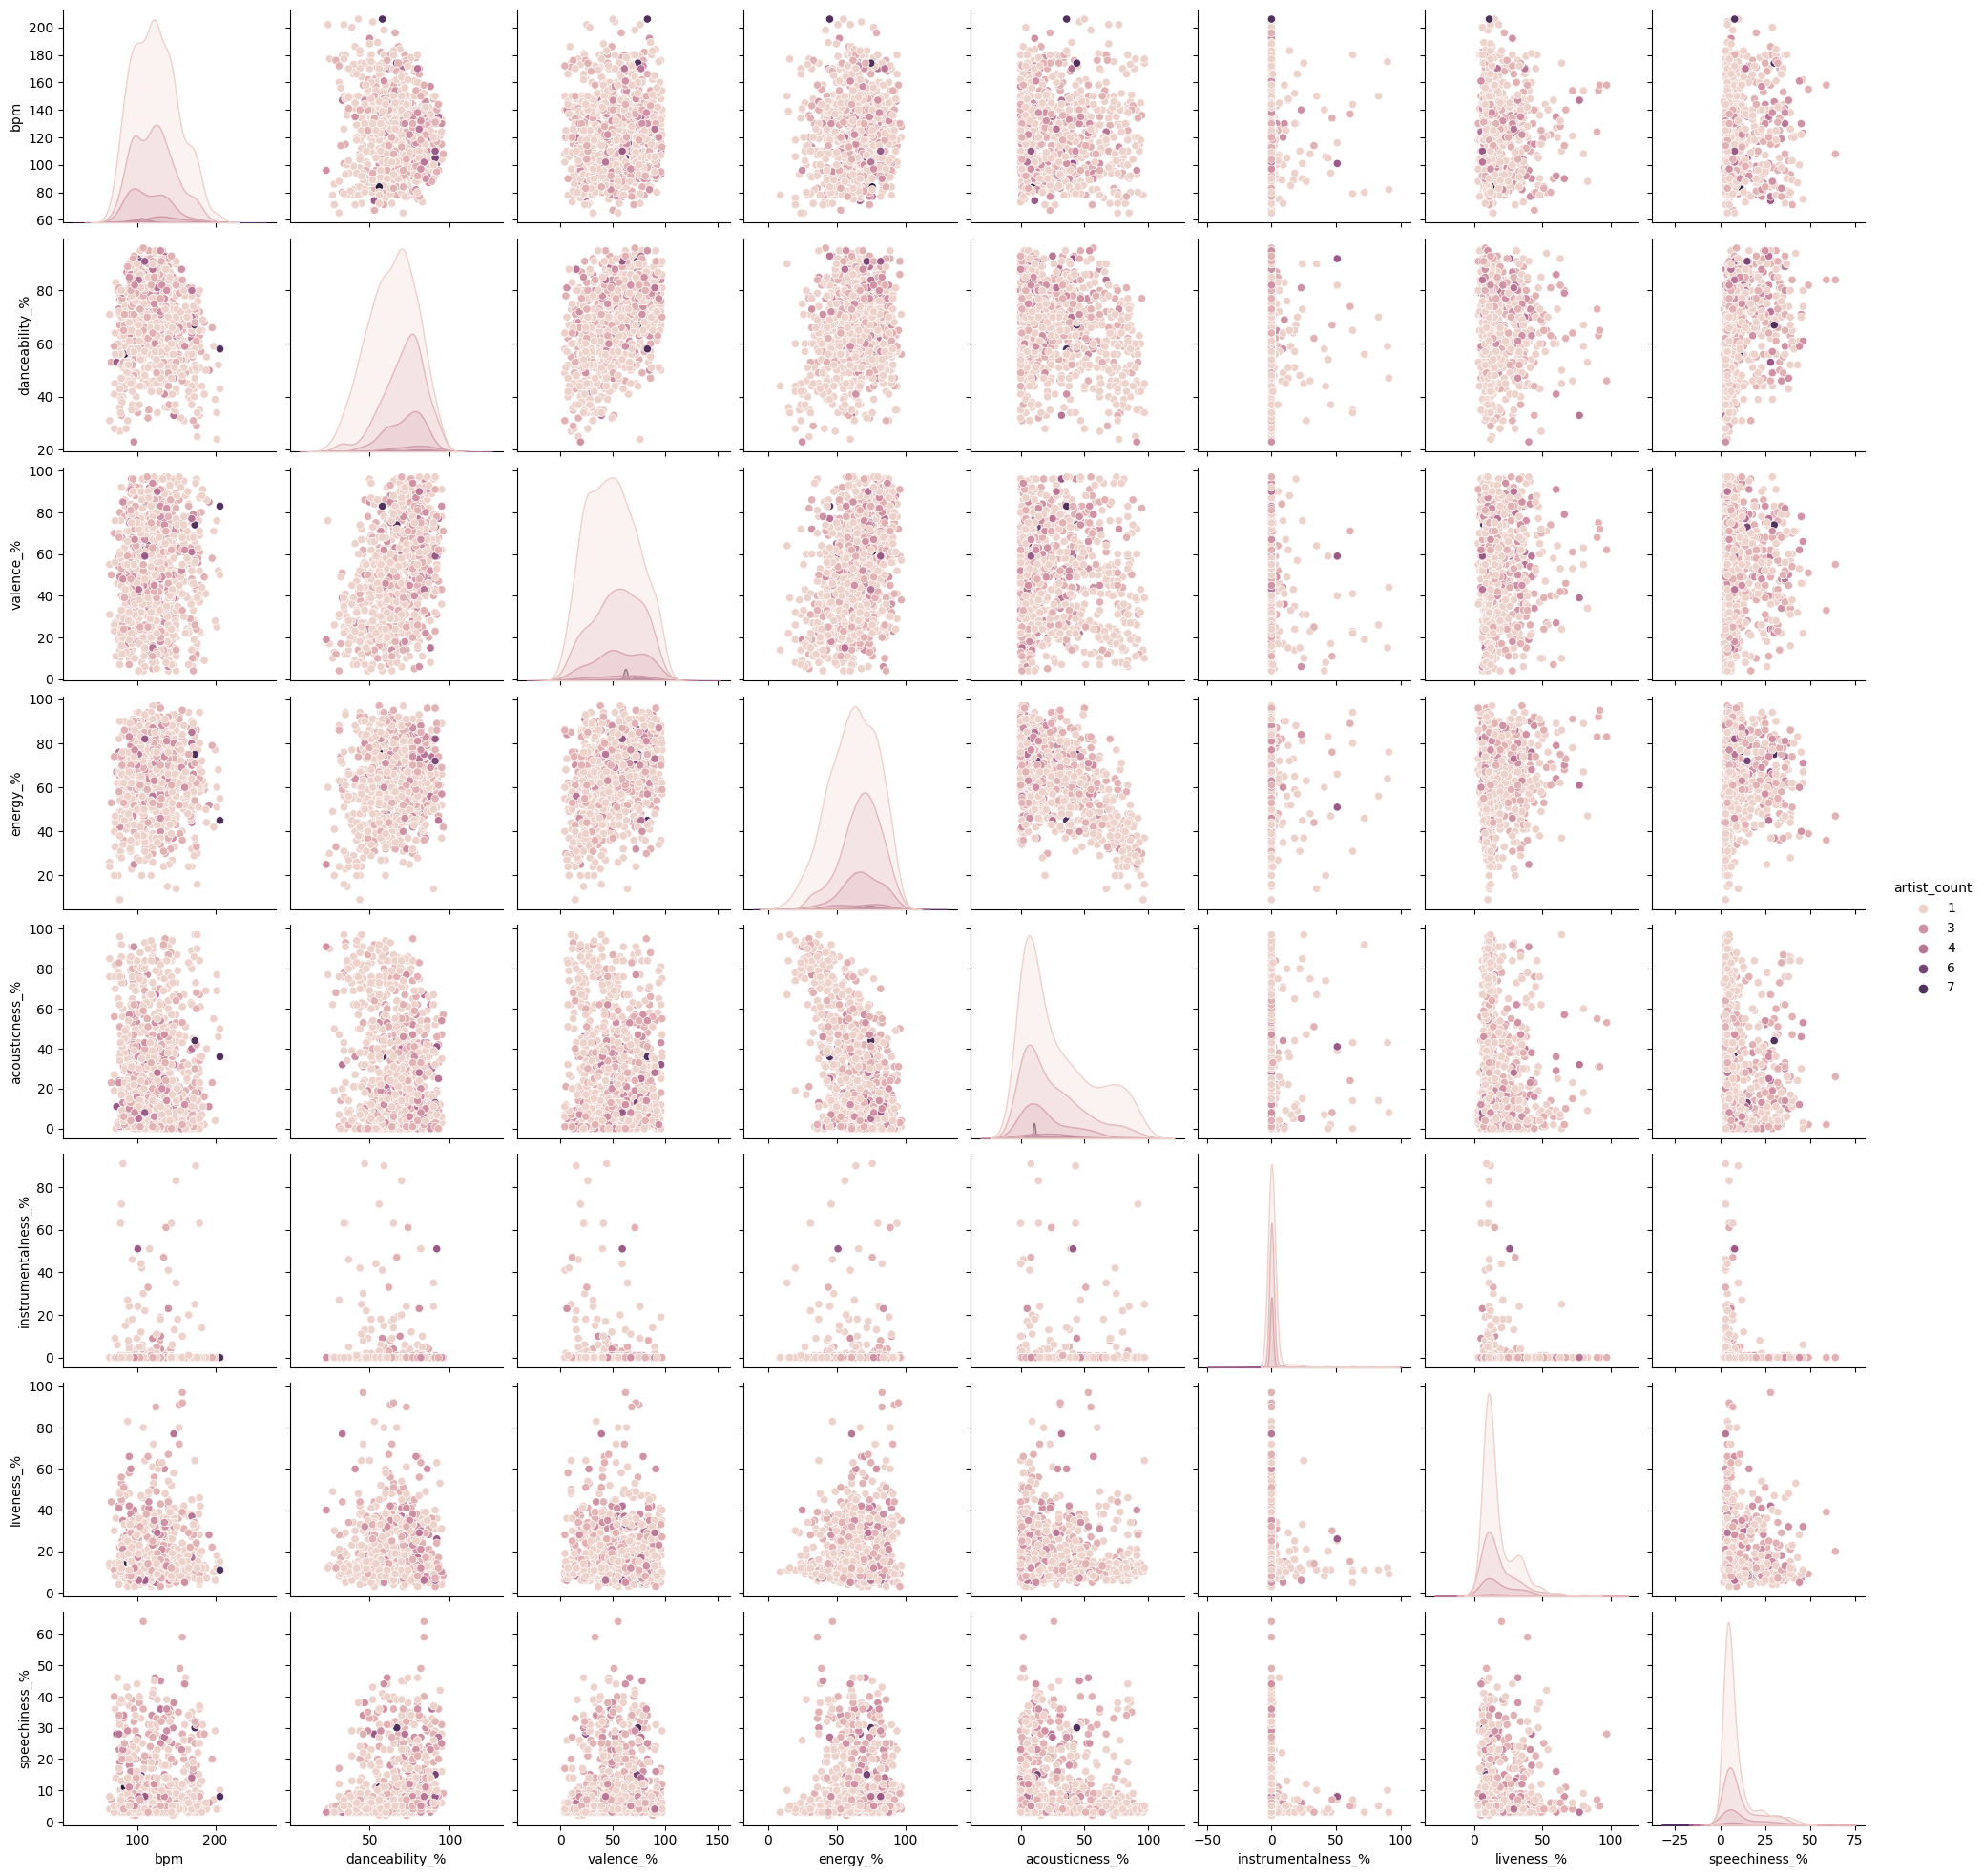

In [ ]:
sns.pairplot(df, hue='artist_count', vars=['bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%'])